<a href="https://colab.research.google.com/github/PuteriAndiniRosmadila/UTS/blob/main/UTS_Machine_Learning_Puteri_Andini_Rosmadila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Dataset

In [ ]:
import pandas as pd
import numpy as np

#dataset from klearn
from sklearn.datasets import load_breast_cancer


#import model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mengambil data dari sklearn
data = load_breast_cancer()
# transform ke bentuk dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
# menambahkan kolom target pada data
df['target'] = pd.Series(data.target)

In [ ]:
#menampilkan data
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: xlabel='mean radius', ylabel='mean texture'>

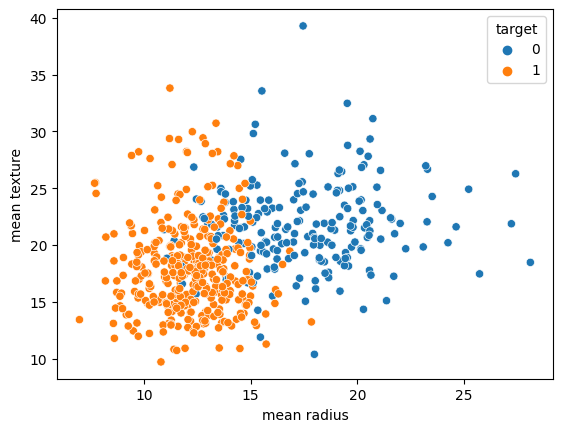

In [ ]:
# membuat scatter plot
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=df)

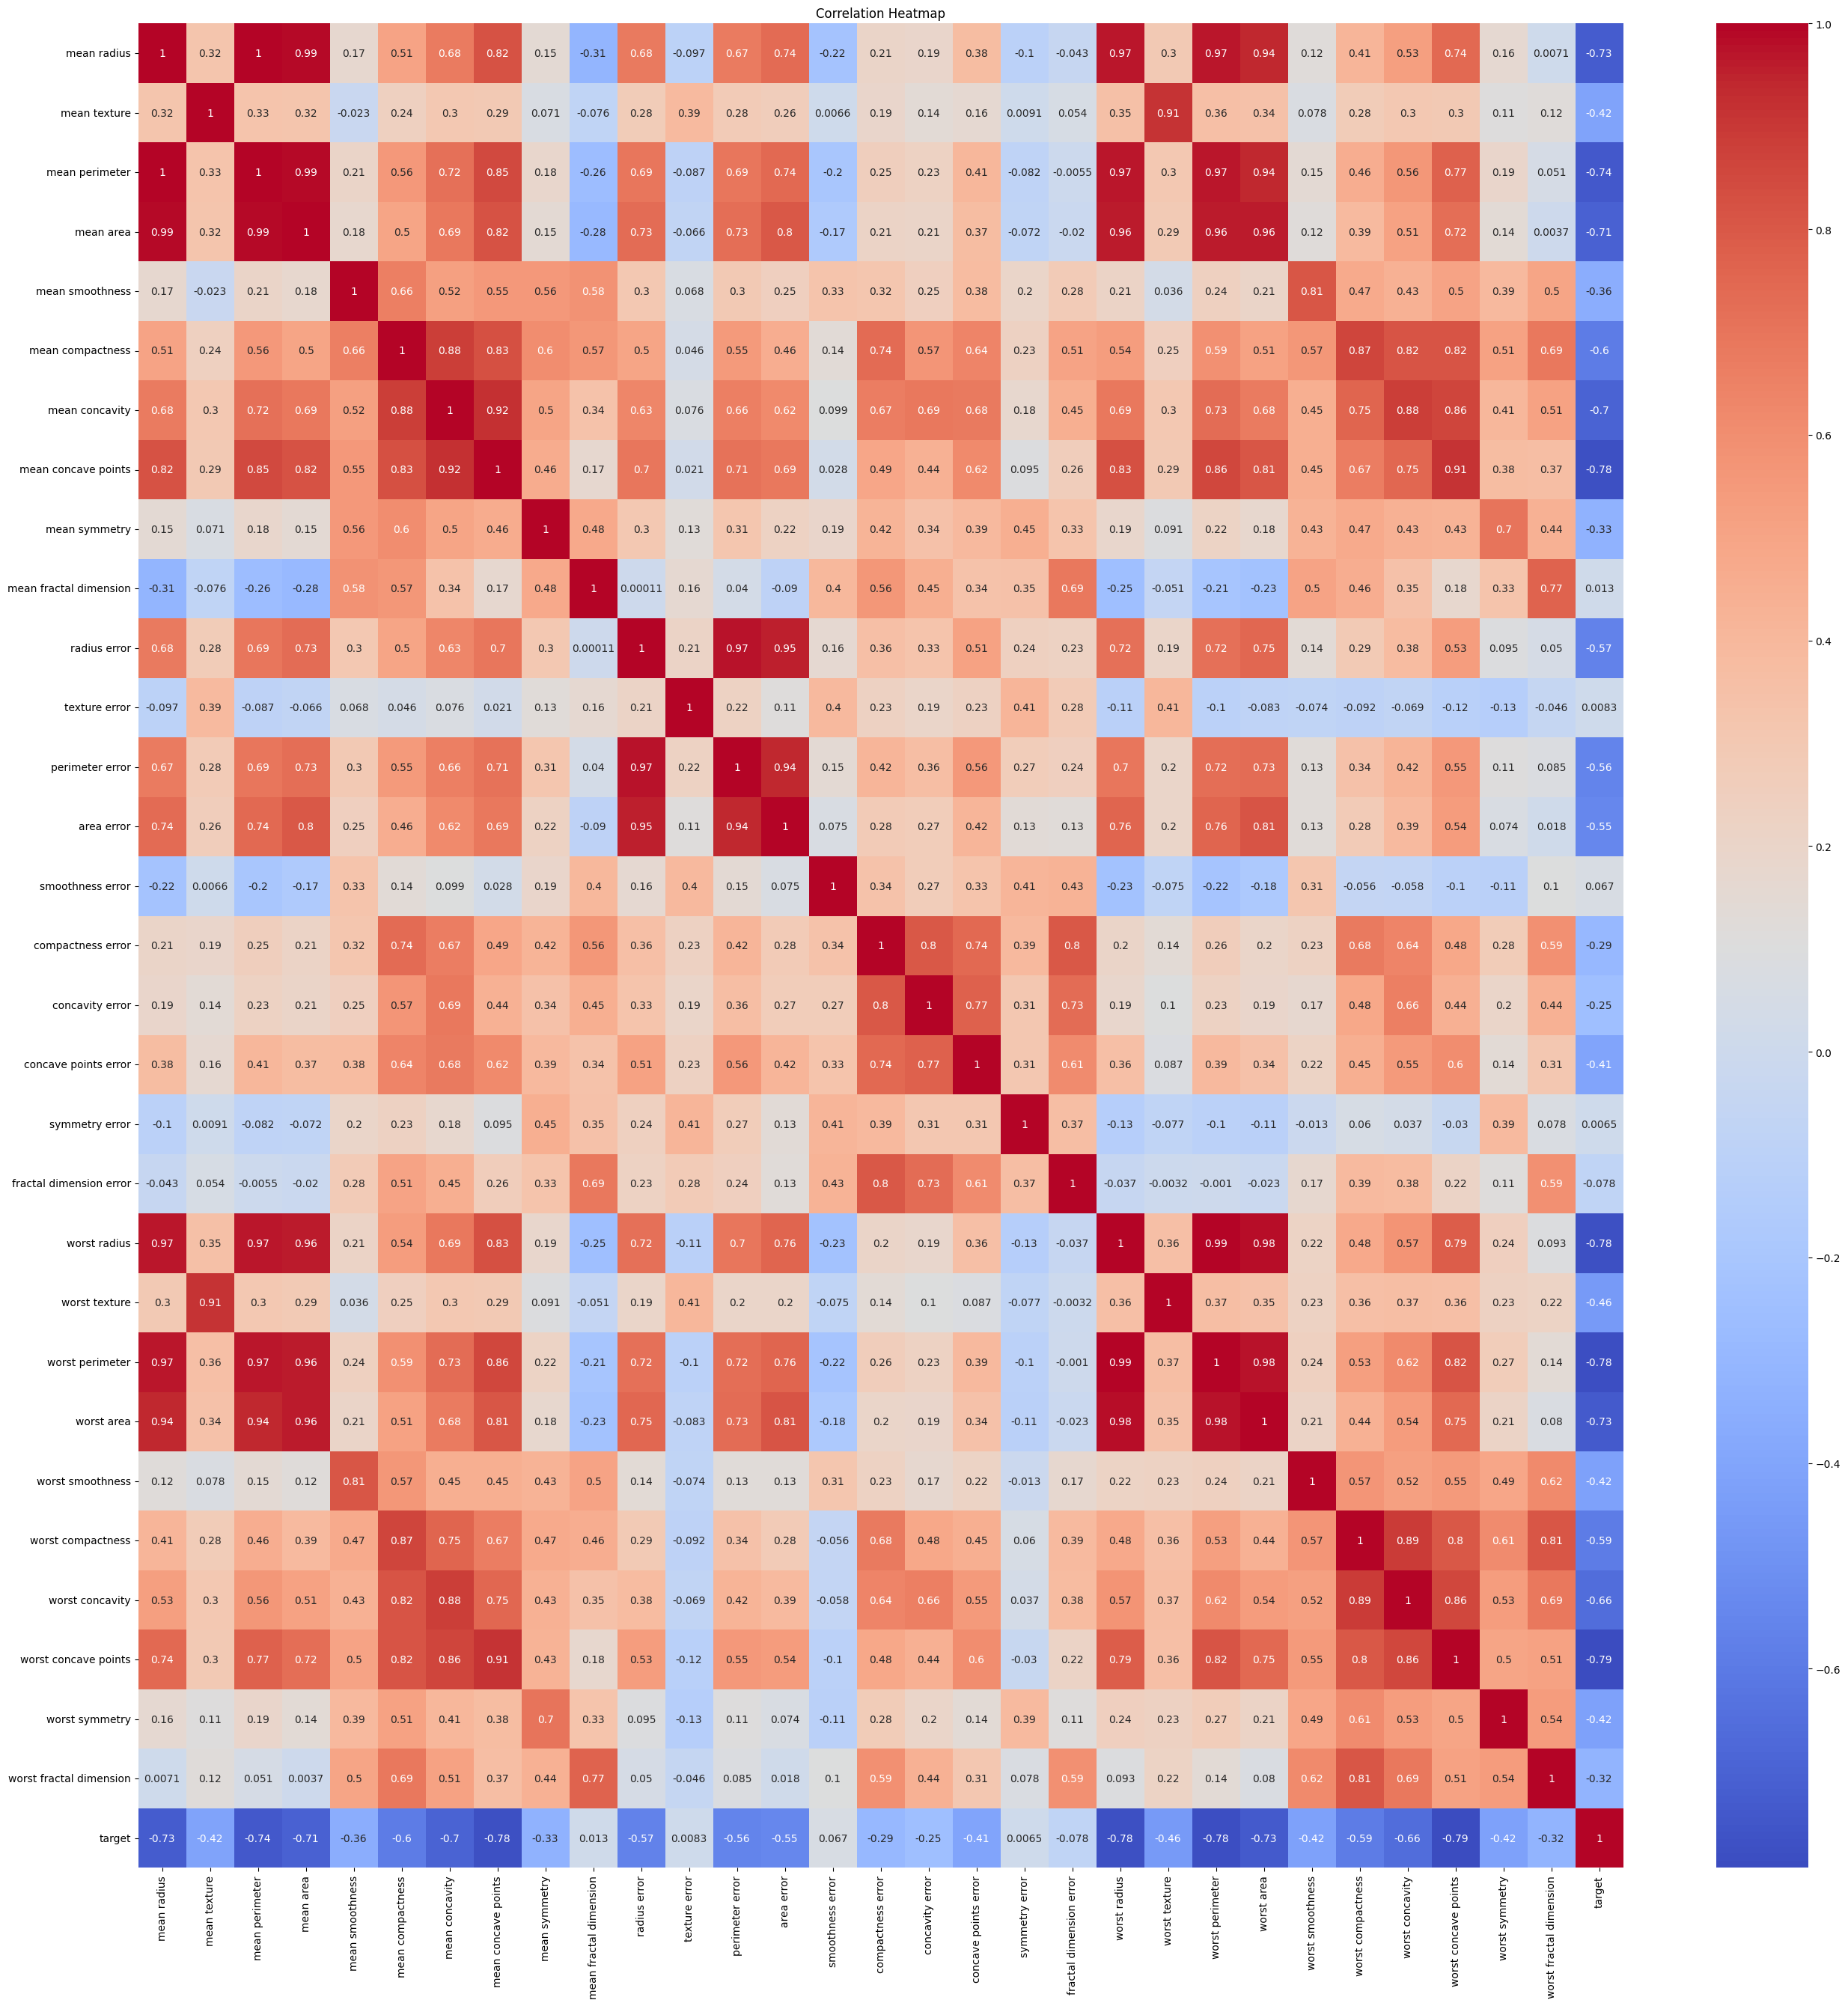

In [ ]:
# plot untuk menampilkan korelasi antar variabel
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

# EDA

In [ ]:
#melihat jumlah data dan banyaknya variabel.
df.shape

(569, 31)

In [ ]:
# melihat missing value setiap data, nama variabel, dan tipe data setiap variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#Training data

In [ ]:
#Membagi data menjadi trianing dan testing dengan rasio 7:2
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names],
                                                    df['target'],test_size=0.3,
                                                    random_state=42, 
                                                    shuffle=False)
#menampilkan jumlah data training dan testing
print ('Data train : %i || Data test : %i' % (X_train.shape[0],X_test.shape[0]) )     

Data train : 398 || Data test : 171


In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Test hasil model Decision Tree
akurasi_dt = accuracy_score(y_test,
                            dt.predict(X_test))
print("Akurasi Model Decision Tree:", akurasi_dt)

Akurasi Model Decision Tree: 0.9064327485380117


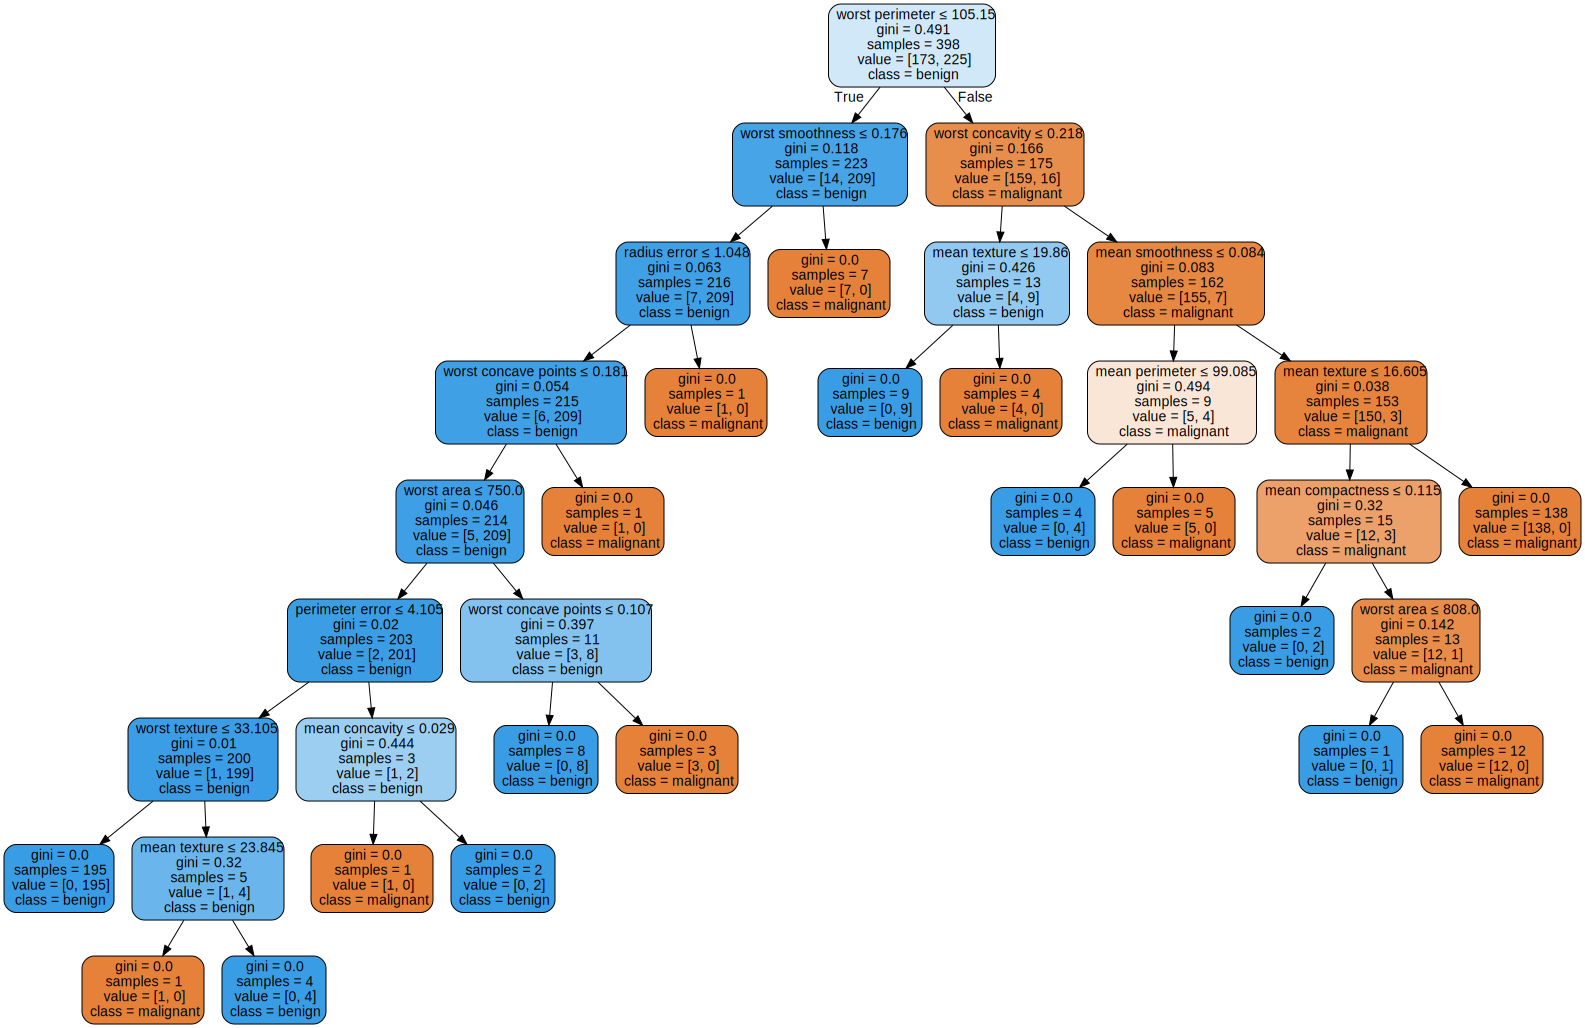

In [ ]:
#Menampilkan model decision tree yang telah train
model_dt = export_graphviz(dt, out_file=None, 
                           feature_names=data.feature_names,  
                           class_names=data.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(model_dt)
graph

In [ ]:
# Train data menggunakan Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Mengevaluasi hasil model Random Forest
akurasi_rf = accuracy_score(y_test,
                        rf.predict(X_test))
print("Akurasi Model Random Forest:", akurasi_rf)

Akurasi Model Random Forest: 0.9590643274853801


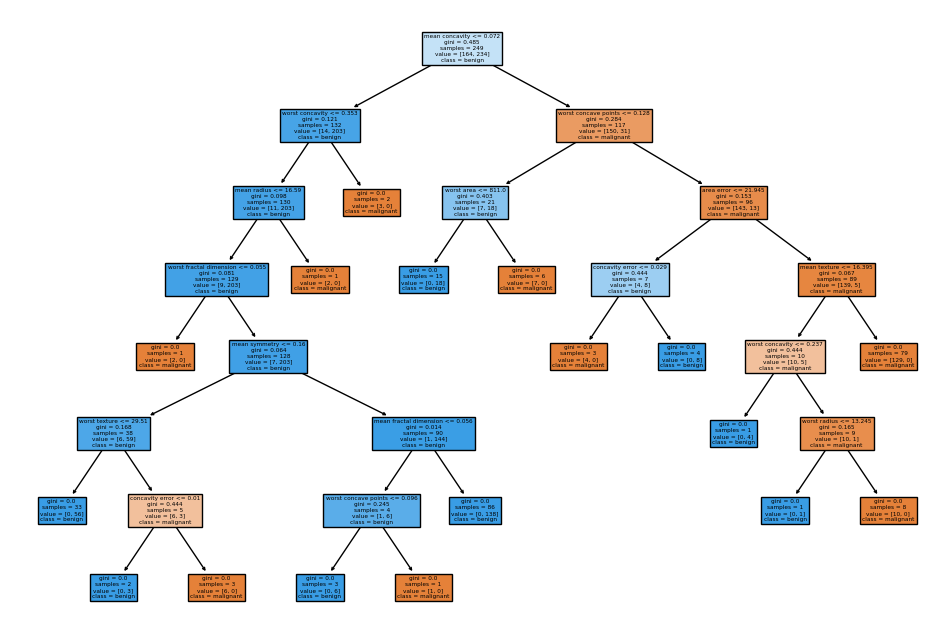

In [ ]:
#Menampilkan Estimator pertama pada Random Forest
fig, axes = plt.subplots(figsize=(12,8))
plot_tree(rf.estimators_[0], 
          feature_names=data.feature_names,
          class_names=data.target_names,
          filled=True, ax=axes)
plt.show()
     

In [ ]:
# Train data menggunakan Self-Training
st = SelfTrainingClassifier(DecisionTreeClassifier(random_state=0))
st.fit(X_train, y_train)

# Evaluasi hasil model Self-Training
akurasi_st = accuracy_score(y_test,
                        st.predict(X_test))
print("Self-Training accuracy:", akurasi_st)

Self-Training accuracy: 0.9064327485380117


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


#Perbandingan Akurasi Model

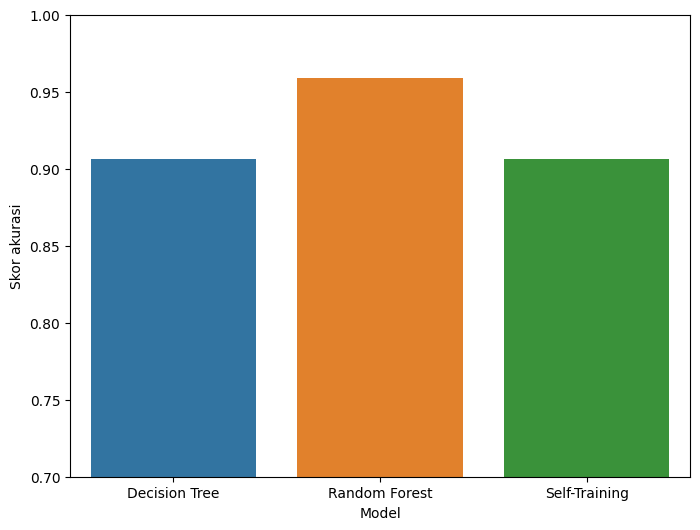

In [ ]:
#Membuat plot perbandingan akurasi dari ketiga model
plt.figure(figsize=(8, 6))
sns.barplot(x=['Decision Tree', 'Random Forest', 'Self-Training'],
            y=[akurasi_dt, akurasi_rf, akurasi_st])
plt.ylim(0.7, 1.0)
plt.ylabel("Skor akurasi")
plt.xlabel("Model")
plt.show()